In [1]:
from bs4 import BeautifulSoup
import requests

In [5]:

from markdown2 import Markdown
markdowner = Markdown()

In [6]:
data = requests.get("https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1").json()

In [7]:

soup = BeautifulSoup(data["items"], 'html.parser')


In [28]:
rows = []
for post in soup.find_all("div", class_="redtracker-list-item"):
    #print(post)
    link = "https://boards.euw.leagueoflegends.com"+post.find("a",class_="title-link")["href"]
    title = post.find("a", class_="title-link").text
    category = post.find("div", class_="title-box").find("div", class_="byline").find("a").text
    author = post.find("div", class_="author byline").find("a").text
    date = post.find("span", class_="timeago byline")["title"]
    contents = post.find_all("div", {"class":["content"]})
    if len(contents) == 2:
        parent_content = markdowner.convert(contents[0].text.replace("\t",""))
        post_content = markdowner.convert(contents[1].text.replace("\t",""))
    else:
        parent_content = None
        post_content = markdowner.convert(contents[0].text.replace("\t",""))
    
    row = {
        "link":link,
        "title":title,
        "category":category,
        "author":author,
        "date":date,
        "parent_content":parent_content,
        "post_content":post_content
    }
    rows.append(row)

In [9]:
import json

In [91]:
with open("redtracker_test.json","w") as f:
    json.dump(rows, f)

In [10]:
import urllib

In [11]:
markdowner.convert(date)

'<p>2019-12-31T21:22:33.546+0000</p>\n'

In [12]:
urllib.parse.quote("2019-10-17T21:12:40.323+0000")

'2019-10-17T21%3A12%3A40.323%2B0000'

In [13]:
last_created = "2020-10-17T21:12:40.323+0000"
url = "https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to={}".format(urllib.parse.quote(last_created))

In [14]:
data = requests.get(url).json()

In [31]:
rows = []
while True:
    url = "https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to={}".format(urllib.parse.quote(last_created))
    print(url)
    data = requests.get(url).json()
    
    soup = BeautifulSoup(data["items"], 'html.parser')
    
    for post in soup.find_all("div", class_="redtracker-list-item"):
        link = "https://boards.euw.leagueoflegends.com"+post.find("a",class_="title-link")["href"]
        title = post.find("a", class_="title-link").text
        category = post.find("div", class_="title-box").find("div", class_="byline").find("a").text
        author = post.find("div", class_="author byline").find("a").text
        date = post.find("span", class_="timeago byline")["title"]
        contents = post.find_all("div", {"class":["content"]})
        if len(contents) == 2:
            parent_content = markdowner.convert(contents[0].text.replace("\t",""))
            post_content = markdowner.convert(contents[1].text.replace("\t",""))
        else:
            parent_content = None
            post_content = markdowner.convert(contents[0].text.replace("\t",""))

        row = {
            "link":link,
            "title":title,
            "category":category,
            "author":author,
            "date":date,
            "parent_content":parent_content,
            "post_content":post_content
        }
        rows.append(row)
    if last_created == data["lastCreated"]:
        break
    last_created = data["lastCreated"]

https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-12-06T23%3A32%3A24.264%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-10-17T13%3A43%3A19.074%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-10-17T10%3A54%3A26.129%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-10-15T23%3A22%3A26.332%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-08-10T13%3A00%3A40.966%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-07-16T09%3A22%3A11.427%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-06-25T14%3A04%3A44.627%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-05-15T12%3A25%3A24.345%2B0000
https://boards.euw.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-04-02T08%3A30%3A07.181%2B0000
h

In [32]:
last_created = "2020-10-17T21:12:40.323+0000"
#last_created = "2017-10-10T23:17:30.078+0000"
while True:
    url = "https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to={}".format(urllib.parse.quote(last_created))
    print(url)
    data = requests.get(url).json()
    
    soup = BeautifulSoup(data["items"], 'html.parser')
    
    for post in soup.find_all("div", class_="redtracker-list-item"):
        link = "https://boards.na.leagueoflegends.com"+post.find("a",class_="title-link")["href"]
        title = post.find("a", class_="title-link").text
        category = post.find("div", class_="title-box").find("div", class_="byline").find("a").text
        author = post.find("div", class_="author byline").find("a").text
        date = post.find("span", class_="timeago byline")["title"]
        contents = post.find_all("div", {"class":["content"]})
        if len(contents) == 2:
            parent_content = markdowner.convert(contents[0].text.replace("\t",""))
            post_content = markdowner.convert(contents[1].text.replace("\t",""))
        else:
            parent_content = None
            post_content = markdowner.convert(contents[0].text.replace("\t",""))

        row = {
            "link":link,
            "title":title,
            "category":category,
            "author":author,
            "date":date,
            "parent_content":parent_content,
            "post_content":post_content
        }
        rows.append(row)
    if last_created == data["lastCreated"]:
        break
    last_created = data["lastCreated"]

https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-10-17T21%3A12%3A40.323%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-02-24T20%3A19%3A38.245%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-02-05T19%3A00%3A40.163%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-01-23T08%3A32%3A45.264%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-01-16T03%3A31%3A41.872%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-12-13T20%3A56%3A53.788%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-12-06T23%3A32%3A24.264%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-11-25T21%3A59%3A06.838%2B0000
https://boards.na.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-11-15T18%3A54%3A20.693%2B0000
https://bo

TypeError: quote_from_bytes() expected bytes

In [33]:
last_created = "2020-10-17T21:12:40.323+0000"
while True:
    url = "https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to={}".format(urllib.parse.quote(last_created))
    print(url)
    data = requests.get(url).json()
    
    soup = BeautifulSoup(data["items"], 'html.parser')
    
    for post in soup.find_all("div", class_="redtracker-list-item"):
        link = "https://boards.pbe.leagueoflegends.com"+post.find("a",class_="title-link")["href"]
        title = post.find("a", class_="title-link").text
        category = post.find("div", class_="title-box").find("div", class_="byline").find("a").text
        author = post.find("div", class_="author byline").find("a").text
        date = post.find("span", class_="timeago byline")["title"]
        contents = post.find_all("div", {"class":["content"]})
        if len(contents) == 2:
            parent_content = markdowner.convert(contents[0].text.replace("\t",""))
            post_content = markdowner.convert(contents[1].text.replace("\t",""))
        else:
            parent_content = None
            post_content = markdowner.convert(contents[0].text.replace("\t",""))

        row = {
            "link":link,
            "title":title,
            "category":category,
            "author":author,
            "date":date,
            "parent_content":parent_content,
            "post_content":post_content
        }
        rows.append(row)
    if last_created == data["lastCreated"]:
        break
    last_created = data["lastCreated"]

https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-10-17T21%3A12%3A40.323%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-02-20T05%3A20%3A54.570%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2020-01-07T01%3A02%3A40.526%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-11-26T22%3A50%3A26.075%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-10-14T21%3A25%3A55.282%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-09-20T05%3A05%3A24.555%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-09-16T09%3A30%3A10.780%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-08-30T21%3A07%3A59.501%2B0000
https://boards.pbe.leagueoflegends.com/en/redtracker?json_wrap=1&created_to=2019-08-14T01%3A04%3A42.228%2B0000
h

TypeError: quote_from_bytes() expected bytes

In [34]:
with open("redtracker_full.json","w") as f:
    json.dump(rows, f)

In [35]:
len(rows)

124553

In [145]:
last_created = "2020-10-17T21:12:40.323+0000"

rows_fr = []
while True:
    url = "https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to={}".format(urllib.parse.quote(last_created))
    print(url)
    data = requests.get(url).json()
    
    soup = BeautifulSoup(data["items"], 'html.parser')
    
    for post in soup.find_all("div", class_="redtracker-list-item"):
        link = "https://boards.euw.leagueoflegends.com"+post.find("a",class_="title-link")["href"]
        author = post.find("div", class_="author byline").find("a").text
        date = post.find("span", class_="timeago byline")["title"]
        contents = post.find_all("div", {"class":["content"]})
        if len(contents) == 2:
            parent_content = markdowner.convert(contents[0].text.replace("\t",""))
            post_content = markdowner.convert(contents[1].text.replace("\t",""))
        else:
            parent_content = None
            post_content = markdowner.convert(contents[0].text.replace("\t",""))

        row = {
            "link":link,
            "author":author,
            "date":date,
            "parent_content":parent_content,
            "post_content":post_content
        }
        rows_fr.append(row)
    if last_created == data["lastCreated"]:
        break
    last_created = data["lastCreated"]

https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2020-10-17T21%3A12%3A40.323%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2019-02-22T13%3A45%3A41.363%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2018-10-26T16%3A43%3A20.880%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2018-09-12T17%3A14%3A17.348%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2018-07-20T16%3A09%3A10.533%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2018-06-20T08%3A41%3A45.929%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2018-06-14T15%3A43%3A40.454%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2018-04-17T09%3A41%3A46.329%2B0000
https://boards.euw.leagueoflegends.com/fr/redtracker?json_wrap=1&created_to=2017-10-27T17%3A23%3A33.971%2B0000
h

In [146]:
dates_fr = [i["date"] for i in rows_fr]

In [147]:
dates_fr

['2019-05-15T09:26:19.224+0000',
 '2019-05-14T10:10:41.933+0000',
 '2019-05-13T11:47:43.273+0000',
 '2019-05-13T11:43:21.767+0000',
 '2019-05-13T11:36:23.812+0000',
 '2019-05-10T12:25:28.115+0000',
 '2019-05-10T12:20:05.552+0000',
 '2019-05-10T11:25:23.479+0000',
 '2019-05-10T10:14:03.639+0000',
 '2019-05-10T08:53:08.329+0000',
 '2019-05-10T08:06:09.275+0000',
 '2019-05-09T17:02:03.945+0000',
 '2019-05-09T15:08:27.713+0000',
 '2019-05-09T14:58:01.055+0000',
 '2019-05-09T14:33:57.769+0000',
 '2019-05-09T14:33:08.582+0000',
 '2019-05-09T14:30:39.218+0000',
 '2019-05-09T14:11:46.477+0000',
 '2019-05-09T13:53:23.572+0000',
 '2019-05-09T13:52:26.648+0000',
 '2019-05-09T13:47:36.283+0000',
 '2019-05-09T13:45:11.069+0000',
 '2019-05-09T13:26:20.568+0000',
 '2019-05-03T17:42:12.269+0000',
 '2019-05-03T15:32:20.355+0000',
 '2019-05-03T11:52:19.716+0000',
 '2019-04-12T17:09:22.060+0000',
 '2019-04-12T17:08:36.354+0000',
 '2019-04-10T09:03:15.184+0000',
 '2019-04-06T15:09:38.247+0000',
 '2019-04-

In [148]:
import pandas as pd
s = pd.Series(dates_fr)

In [150]:
s.astype("datetime64")

0      2019-05-15 09:26:19.224
1      2019-05-14 10:10:41.933
2      2019-05-13 11:47:43.273
3      2019-05-13 11:43:21.767
4      2019-05-13 11:36:23.812
                 ...          
1189   2015-01-29 14:56:01.149
1190   2015-01-23 17:34:01.693
1191   2015-01-23 16:27:41.911
1192   2015-01-23 11:50:17.551
1193   2015-01-23 11:50:17.551
Length: 1194, dtype: datetime64[ns]

In [153]:
df = pd.DataFrame([s.astype("datetime64")]).T

In [154]:
df

,0
0,2019-05-15 09:26:19.224
1,2019-05-14 10:10:41.933
2,2019-05-13 11:47:43.273
3,2019-05-13 11:43:21.767
4,2019-05-13 11:36:23.812
...,...
1189,2015-01-29 14:56:01.149
1190,2015-01-23 17:34:01.693
1191,2015-01-23 16:27:41.911
1192,2015-01-23 11:50:17.551


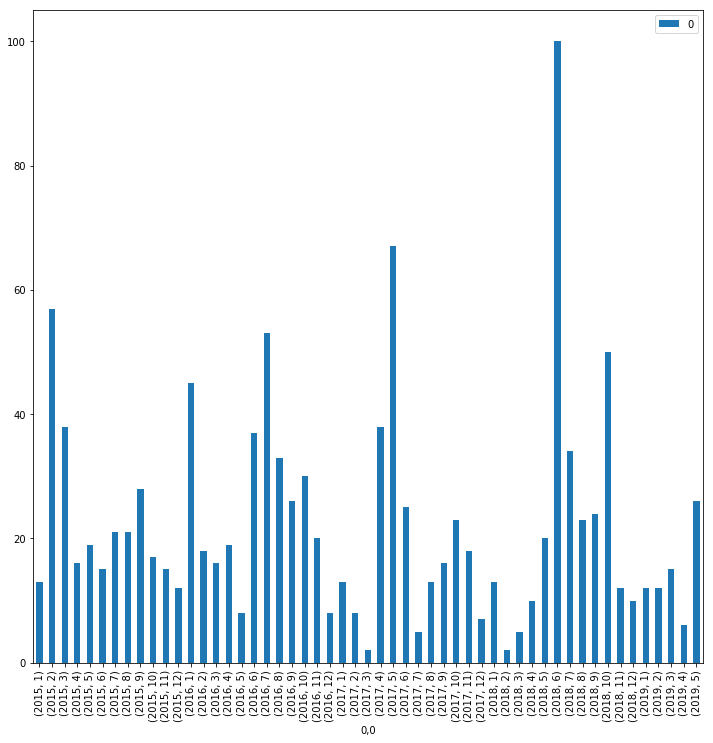

In [164]:
df.groupby([df[0].dt.year,df[0].dt.month]).count().plot(kind="bar", figsize=(12,12))

In [162]:
df[0].dt